In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import SimpleITK as sitk
from pathlib import Path
from myshow import myshow, myshow3d
import numpy as np
import nibabel as nib
import os
from dipy.align.imaffine import AffineMap

/Users/naimsassine/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
t2_train_table = pd.read_csv('E:/Memoire/ProstateX/generated/train/dataframes/training_meta_data.csv')
t2_case = t2_train_table.iloc[327]
t2_case_image = sitk.ReadImage(str(t2_case['resampled_nifti']))
t2_array = sitk.GetArrayViewFromImage(t2_case_image)

In [196]:
t2_case

Unnamed: 0                                                       410
ProxID                                                ProstateX-0202
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                1
pos                                    (-0.02085, -44.5506, 16.7349)
ijk                                                   (167, 148, 10)
zone                                                              AS
ClinSig                                                         True
Name: 327, dtype: object

In [197]:
prostate_mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/ProstateX-0202.nii.gz.npy')
lesion_mask = np.load('E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/ProstateX-0202-Finding1-t2_tse_tra0_ROI.nii.gz.npy')


path = 'E:/Memoire/ProstateX/Masks/Files/lesions/Masks/T2/ProstateX-0202-Finding1-t2_tse_tra0_ROI.nii'
lesion_original = sitk.ReadImage(path)  
path = 'E:/Memoire/ProstateX/Masks/Files/prostate/mask_prostate/ProstateX-0202.nii'
prostate_original = sitk.ReadImage(path)

In [198]:
myshow(lesion_original)

interactive(children=(IntSlider(value=10, description='z', max=20), Output()), _dom_classes=('widget-interact'…

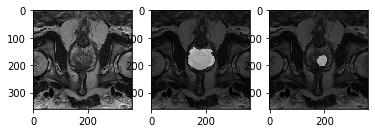

In [199]:
z = 10
plt.figure()
plt.subplot(1,3,1)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')

plt.subplot(1,3,2)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(prostate_mask[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.subplot(1,3,3)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(lesion_mask[z, :, :], 'gray', interpolation='none', alpha=0.5)

plt.show()

In [202]:
print(t2_array.shape)
print(prostate_mask.shape)
print(lesion_original.GetSize())

(21, 360, 360)
(21, 360, 360)
(320, 320, 21)


In [75]:
def sum_lesions_to_pros_masks() :
    path_pros = 'E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/Prostate_Masks/'
    path_les = 'E:/Memoire/ProstateX/generated/Masks/Registered_Flipped/T2_Lesions_Masks/'
    lesions_table = pd.read_csv('E:/Memoire/ProstateX/Masks/Files/lesions/PROSTATEx_Classes.csv')
    for i in range(0, 299) : 
        lesion_case = lesions_table.iloc[i]
        if "0025" in lesion_case["ID"][:14]: 
            print("Unauthorized Value")
        else : 
            prostate_mask = np.load(path_pros + lesion_case["ID"][:14] + ".nii.gz.npy")
            try : 
                lesion_mask = np.load(path_les + lesion_case["ID"].replace("_", "-") + "-t2_tse_tra_ROI.nii.gz.npy")
            except : 
                lesion_mask = np.load(path_les + lesion_case["ID"].replace("_", "-") + "-t2_tse_tra0_ROI.nii.gz.npy")

            thresh = 0.0
            maxval = 1
            bin_prostate = (prostate_mask > thresh) * maxval
            bin_lesion = (lesion_mask > thresh) * maxval

            if lesion_case["Clinically Significant"] == True : 
                summed = bin_prostate + bin_lesion + bin_lesion
                summed = np.where(summed==2, 3, summed) 
            else : 
                summed = bin_prostate + bin_lesion
            
            filepath = 'E:/Memoire/ProstateX/generated/Masks/Summed/' + lesion_case["ID"]
            np.save(Path(filepath), summed)

In [76]:
sum_lesions_to_pros_masks()

Unauthorized Value


In [88]:
t2_case = t2_train_table.iloc[105]
t2_case_image = sitk.ReadImage(str(t2_case['resampled_nifti']))
t2_array = sitk.GetArrayViewFromImage(t2_case_image)
t2_case

Unnamed: 0                                                       124
ProxID                                                ProstateX-0075
DCMSerDescr                                               t2_tse_tra
resampled_nifti    E:/Memoire/ProstateX/generated/tra...
sequence_type                                                     t2
fid                                                                1
pos                                     (20.1033, 33.0877, -65.7973)
ijk                                                   (393, 327, 14)
zone                                                              TZ
ClinSig                                                        False
Name: 105, dtype: object

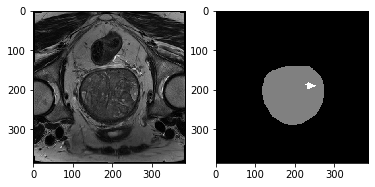

In [90]:
# let's load the images and see if it worked
# if it did, apply le thresholding!
summed = np.load('E:/Memoire/ProstateX/generated/Masks/Summed/ProstateX-0075_Finding1.npy')

z = 10
plt.figure()
plt.subplot(1,2,1)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')

plt.subplot(1,2,2)
plt.imshow(t2_array[z, :, :], 'gray', interpolation='none')
plt.imshow(summed[z, :, :], 'gray', interpolation='none', alpha=1)

plt.show()

In [91]:
#summed = np.load('E:/Memoire/ProstateX/generated/Masks/Summed/ProstateX-0099_Finding1.npy')
np.unique(summed)

array([0, 1, 2])